# Training linear regression models using various optimization methods

## Generate a set of synthetic data

In [1]:
import numpy as np      # for all the matrix and vector operations (we will always do this for this class.)
import matplotlib.pyplot as plt   # for plotting
plt.rcParams['axes.labelsize'] = 14    # set the label size on each axis
plt.rcParams['xtick.labelsize'] = 12   # set the label size for xtick values
plt.rcParams['ytick.labelsize'] = 12   # set the label size for ytick values

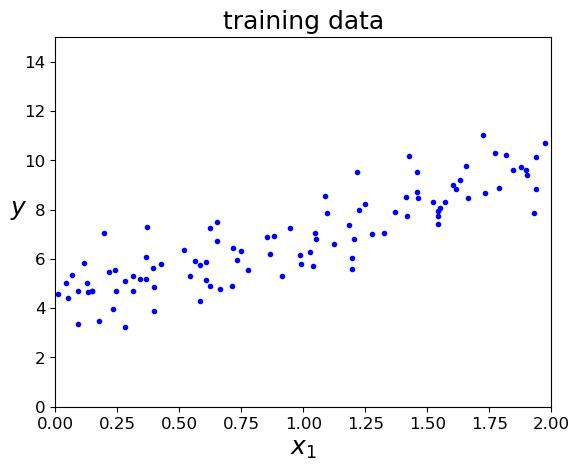

(100, 1)
(100, 1)


In [2]:
np.random.seed(42)   # set the random seed to make sure that we all generate the same random numbers
x = 2 * np.random.rand(100, 1)   # x values are uniformly sampled from [0,2] 
y = 4 + 3 * x + np.random.randn(100, 1)  # Some random Gaussian noise is added.
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("training data",fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
print(x.shape)
print(y.shape)

Construct the matrix **X** and vector **y** for later use. <br>
Note that the matrix **X** and vector **y** are defined as follows: <br>
$\textbf{x} = \begin{bmatrix} 1 & x_1^{(1)}\\ 1 & x_1^{(2)} \\ \cdots \\ 1 & x_1^{(m)} \end{bmatrix}_{m \times 2}$,
$\textbf{y} = \left [\begin{array}{l} y^{(1)} \\ y^{(2)} \\ \cdots \\ y^{(m)} \end{array} \right]_{m \times 1}$, 
where the superscript $(i)$ refers to the $i^{th}$ training example, i.e. the $i^{th}$ dot in the above graph. <br>


In [3]:
# construct the matrix X and the vector y
m = x.shape[0]  # m is the number of training examples
X = np.hstack((np.ones((m,1)),x))  # np.stack simply stacks two vectors (or matrices) horizontally.

Now, let us first implement the normal equation method. 

In [4]:
print(m)
print(X.shape)


100
(100, 2)


## Linear regression using normal equation method

Calculate the normal equation $\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1}(\mathbf{X}^T\mathbf{y})$, where $\hat{\mathbf{\theta}}$ represent the optimal values learned from the training data.

In [6]:
theta_best = np.linalg.inv(X.T @ X) @ (X.T @ y)     

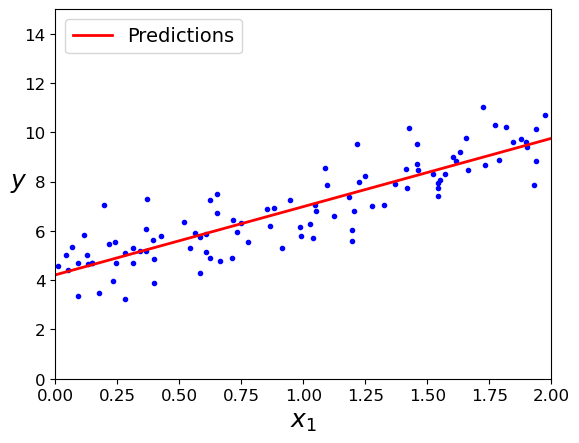

In [7]:
# Now let us plot the learned model on top of our training data 
xnew = np.linspace(0,2,100).reshape(-1,1)
xnew_b = np.hstack((np.ones((100,1)),xnew))
ypredict = np.matmul(xnew_b,theta_best)
plt.plot(x, y, "b.")
plt.plot(xnew, ypredict, 'r-',linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Some quick advantages and disadvantages for the normal equation method:
The normal equation method seems to be a straight forward calculation which is an advantage. There are no loops or iterations required so it is good for a 'quick fit'. 

The disadvantage will come from the computational cost of the $(X^TX)$ term. Since we have $(N+1) \times (N+1)$ dimensions taking place, the computational cost will increase exponentially. Furthermore, since this is a linear regression method, for optimizing nonlinear data this method will not work at all. 
**Note for future**: computational complexity is $O(N^{2.4})$ to $O(N^{3})$

In the above example the normal equation gets the job done with minimal code. But as the amount and complexity of data increases, the normal equation method will become too computationally expensive. When compared to the gradient decent method, the normal method is more computationally expensive and is only applicable to linear optimization. 



## Linear regression using batch gradient descent (BGD)
The BGD algorithm can be summarized as follows: <br>
 1\. Given initial model parameter values, $\mathbf{\theta}$ <br>
 2\. <font color = green>for</font> <font color = blue>*iteration*</font> in <font color = red> *range(max_iterations)*</font>: <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  gradient = $\frac{1}{m} * \textbf{X}^{T}(\textbf{X}\theta - \textbf{y})$ <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\mathbf{\theta} = \theta$ - learning_rate*gradient <br>


The Batch Gradient Decent minimizes the cost function over all of the training data, therefore computuing the whole gradient of the training data each iteration.This gives a very nice and regular search path, but is very computationally expensive due to the sheer number of calculations taking place over the whole gradient.

![image](https://drive.google.com/uc?id=1h1fvOJE01z6d5vizLSMGYVyyvWZ0pD4E)


In [8]:
learning_rate = 0.1
max_iterations = 1000
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialize the theta values (i.e., initial guess for theta)

cost_bgd = []     # cost_bgd is a list that stores the cost function values after each iteration
theta_path_bgd = []  # theta_path_bgd is a list that stores the learned model parameters at each iteration
theta_path_bgd.append(theta)

for iteration in range(max_iterations):
    # Task 4: calculate gradient (10 points)
    gradients = 1/len(X) * X.T @ (X@theta - y)
    # Task 5: update the model (10 points)
    theta = theta - (learning_rate * gradients)
    theta_path_bgd.append(theta)
    cost_bgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

In [9]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


Let us plot up the cost function values as a function of iterations.

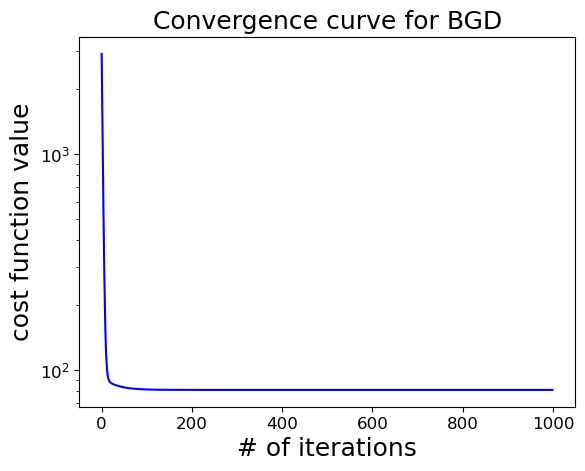

In [10]:
plt.semilogy(np.arange(len(cost_bgd)),cost_bgd,'-b')
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for BGD',fontsize=18)
plt.show()

Let us take a look at how the learned model parameters evolve.

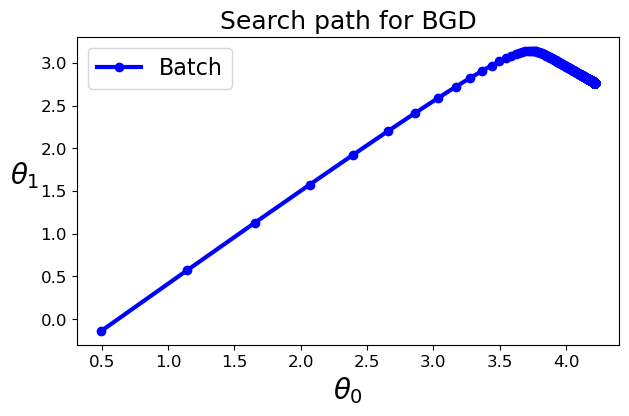

In [11]:
theta_path_bgd = np.array(theta_path_bgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.title('Search path for BGD', fontsize =18)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In the convergence curve, the cost value function is minimized rapidly over a span of ~40 iterations leading to a stable convergence for the remainder of the iterations.

The search path shows the path of the theta values until convergence. The direct path is a product of the cost function being calculated for all the training data. Something to notice is the space between the theta points; after each iteration, as the cost function gets smaller, the distance between theta points shrinks. This occurs until convergence where the points stack up on top of each other, indicating the final values.



## Learning Rate Comparison

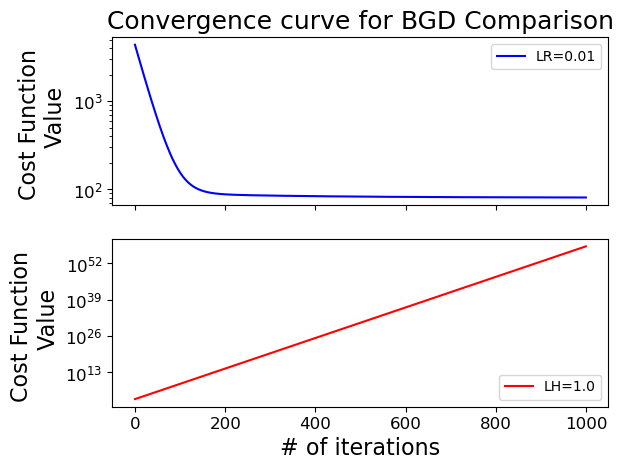

In [12]:
## Learning rate comparison
lr = 0.01
lr2 = 1.0
max_N = 1000
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialize the theta values (i.e., our initial guess for theta)
theta2 = np.random.randn(2,1)  

# 1st axis variables
costBDG = []     # costBDG is a list that stores the cost function values after each iteration
theta_pathBDG = []  # theta_pathBDG is a list that stores the learned model parameters at each iteration
theta_pathBDG.append(theta)

# 2nd axis variabls
costBDG2 = []     
theta_pathBDG2 = []  
theta_pathBDG2.append(theta2)

for iteration in range(max_N):
    # 1st BDG curve
    gradient = 1/len(X) * X.T @ (X@theta - y)
    theta = theta - (lr * gradient)
    theta_pathBDG.append(theta)
    costBDG.append(np.linalg.norm(np.matmul(X,theta) - y)**2)
    # Second BDG curve
    gradient2 = 1/len(X) * X.T @ (X@theta2 - y)
    theta2 = theta2 - (lr2 * gradient2)
    theta_pathBDG2.append(theta2)
    costBDG2.append(np.linalg.norm(np.matmul(X,theta2) - y)**2)

# Plot
fig, (ax0, ax1) = plt.subplots(2,1,sharex=True)
ax0.set_title('Convergence curve for BGD Comparison',fontsize=18)
ax0.semilogy(np.arange(len(costBDG)),costBDG,'-b',label='LR=0.01')
ax0.legend(loc='upper right')
ax0.set_ylabel('Cost Function \n Value',fontsize=16)
ax1.semilogy(np.arange(len(costBDG2)),costBDG2,'-r',label='LH=1.0')
ax1.legend(loc='lower right')
ax1.set_ylabel('Cost Function \n Value',fontsize=16)
plt.xlabel("# of iterations",fontsize=16)
plt.show()

In the top plot the learning rate is set to 0.01; with the smaller rate the cost function takes more iterations to minimize. When comparing it to a learning rate of 0.1 where the convergence is around ~20 iterations, with 
0.01 the cost function converges around ~120 iterations.

The bottom plot shows a learning value of 1.0. With a larger learning rate the cost value function diverges. The cost function values gets larger exponentially as the iterations go on with no convergence.

## Linear regresson using stochastic gradient descent (SGD)
The SGD algorithm can be summarized as follows: <br>
 1\. Given initial model parameter values, $\theta$ <br>
 2\. <font color = green>for</font> <font color = blue>*epoch*</font> in <font color = red> *range(n_epochs)*</font>: <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; randomly shuffle the indices [0,1,2,..., m-1] <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font color = green>for</font> <font color = blue>*i*</font> in <font color = red> *shuffled indices*</font>: <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  gradient = $\textbf{X}_i^{T}(\textbf{X}_i\theta - \textbf{y}_i)$, where subscript $i$ represents the $i^{th}$ row <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\theta = \theta$ - learning_rate*gradient <br>


SGD is a modification of the  BGD; instead of calculating the gradient at every step in a full dataset, the SGD calculates the gradient for one training example each iteration. This results in an irregular search path.
Using [Cornell Optimization](https://optimization.cbe.cornell.edu/index.php?title=Stochastic_gradient_descent) as a resource for optimization, the SGD algorithm:


1.   Shuffle the dataset of size $m$ randomly
2.   A learning rate needs to be selected
3.   Initial theta values need to be selected to kick off the iteration
4.   All parameters from the gradient are updated by computing: 
gradient = $\textbf{X}^T_i(\textbf{X}_i \theta - \textbf{y}_i)$, and $\theta = \theta - \alpha \Delta \textbf{J}$
5.   Repeat the updating in step 4 until convergence to a local minimum.

A stark difference between the BGD and SGD is that the SGD uses only one random training example per iteration to calculate the gradient, instead of all training examples; this greatly increases the computational efficiency.





<font color = red>**NOTE:**</font> <br> SGD only uses one training example to calculate the gradient. Therefore, it is much faster than BGD when it comes to big data with many training examples.

In [13]:
np.random.seed(42)
n_epochs = 50
learning_rate = 0.1   
theta = np.random.randn(2,1)

cost_sgd = []
theta_path_sgd = []
theta_path_sgd.append(theta)

for epoch in np.arange(n_epochs):
    sequence = np.arange(m)
    np.random.shuffle(sequence)
    for num in sequence:
        # extract the ith row of the matrix X and the ith row of the vector y 
        xi = X[num,:].reshape(1,2)
        yi = y[num].reshape(1,1)   
        # calculate the gradient, and update the learned model 
        gradient = xi.T@(xi@theta - yi)
        theta = theta - learning_rate*gradient
        theta_path_sgd.append(theta)
        cost_sgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

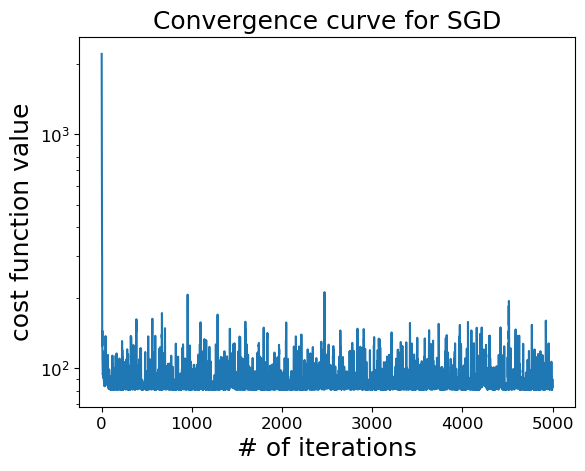

In [14]:
plt.semilogy(np.arange(len(cost_sgd)),cost_sgd)
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for SGD',fontsize=18)
plt.show()

Plot up the search paths of BGD and SGD

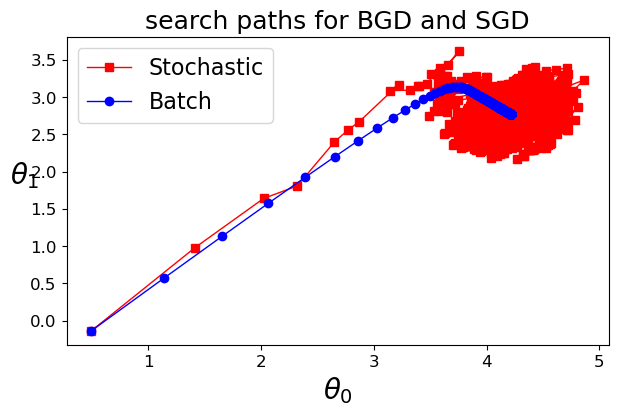

In [15]:
theta_path_sgd = np.array(theta_path_sgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0, 0], theta_path_sgd[:, 1, 0], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.title("search paths for BGD and SGD",fontsize=18)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Compare the convergence curves of BGD and SGD

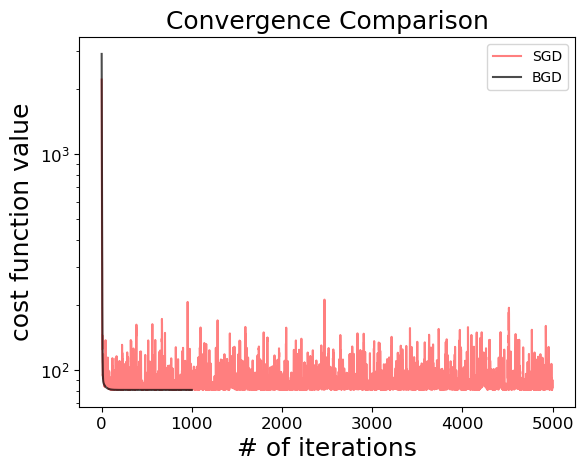

In [16]:
# Comparison convergence plot
plt.semilogy(np.arange(len(cost_sgd)),cost_sgd,'r-',alpha=0.5,label='SGD')  # SGD curve
plt.semilogy(np.arange(len(cost_bgd)),cost_bgd,'-k',alpha=0.7,label='BGD')  # BGD curve
plt.legend(loc='upper right')
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence Comparison',fontsize=18)
plt.show()

**Convergence Curve Comparison** 

---
The BGD convergence curve shows a single line of exponential decay that leads to a clear convergence, whereas the SGD shows an erratic curve that bounces up and down. With the SGD method there is no clear minimum, as the decrease is an average trend that settles close to a minimum throughout the iterations. The SGD is certainly faster, but the curve demonstrates the use of one randomly selected training data per iteration by its erratic curve.

**Search Path Comparison**

---
The BGD search path is regular and direct with the distance between theta values growing smaller with each iteration. The SGD search path shows no such consitency. Initially, there is irregular distances between theta values until a relative zone of convergence is reached. The SGD then randomly bounces around an uncertain convergence point. I would say the BGD method, while computationally expensive, arrives at a definitive theta values. Whereas the SBG is much less computionally expensive (better for large datasets) arrives at a much more ambiguous set of theta values.


## Linear regression using mini-batch gradient descent
How it works:

MDG works by splitting the training data up into small batches, which are used to calculate the gradient and update the model parameters. MGD represents an in-between method that is more robust than the SGD method and more efficient than the BGD method, however, it differs from the BGD by using random batches to calculate samples of the training data, rather than the whole dataset. Furthermore, it differs from the SGD method by using the batches to calculate the gradient, rather than just one random sample per iteration. 


In [17]:
# Mini-batch gradient descent. 
n_epochs = 50
learning_rate = 0.01   
theta = np.random.randn(2,1)

minibatch_size = 20  
cost_mgd = []
theta_path_mgd = []
theta_path_mgd.append(theta)

for epoch in np.arange(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for num in np.arange(0,m,minibatch_size):
        xi = X_shuffled[num:num+minibatch_size,:]
        yi = y_shuffled[num:num+minibatch_size]
        gradient = xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate*gradient
        theta_path_mgd.append(theta)
        cost_mgd.append(np.linalg.norm(np.matmul(X,theta) - y)**2)

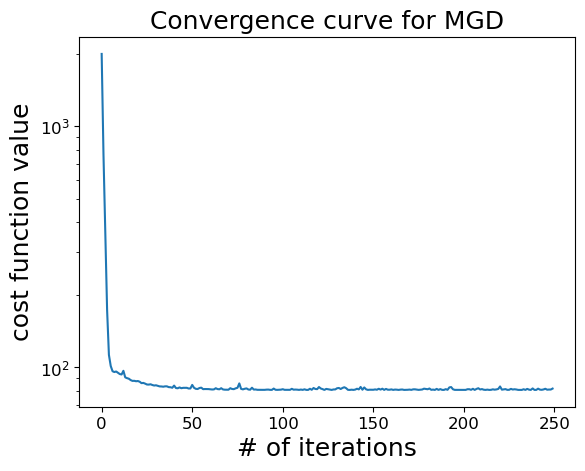

In [18]:
plt.semilogy(np.arange(len(cost_mgd)),cost_mgd)
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence curve for MGD',fontsize=18)
plt.show()

Plot up all the three search paths of BGD, SGD and MGD.

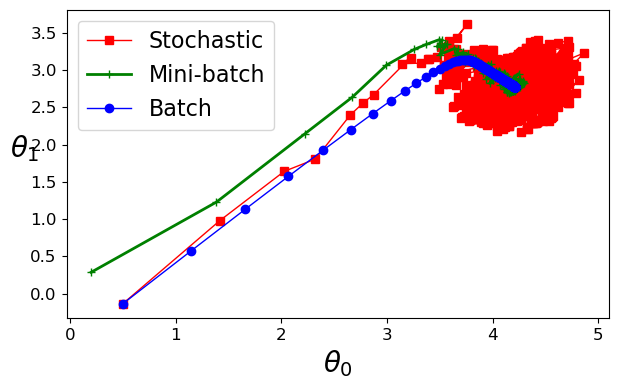

In [19]:
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0, 0], theta_path_sgd[:, 1, 0], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0, 0], theta_path_mgd[:, 1, 0], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0, 0], theta_path_bgd[:, 1, 0], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
#plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Compare the convergence curves of BGD, SGD and MGD

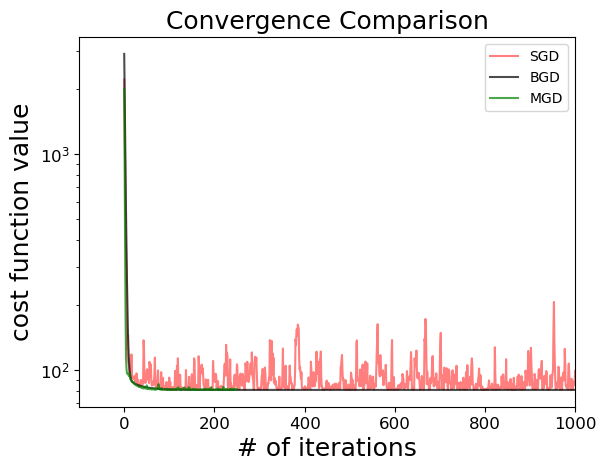

In [20]:
# Comparison convergence plot
plt.semilogy(np.arange(len(cost_sgd)),cost_sgd,'r-',alpha=0.5,label='SGD')   # SGD curve
plt.semilogy(np.arange(len(cost_bgd)),cost_bgd,'-k',alpha=0.7,label='BGD')   # BGD curve
plt.semilogy(np.arange(len(cost_mgd)),cost_mgd,'g-',alpha=0.7,label='MGD')   # MGD curve
plt.legend(loc='upper right')
plt.xlim([-100,1000])
plt.xlabel("# of iterations", fontsize=18)
plt.ylabel("cost function value", rotation=90, fontsize=18)
plt.title('Convergence Comparison',fontsize=18)
plt.show()


**Convergence Curve Comparison** 

---
The BGD and MGD follow a more direct curve, whereas the SGD, as mentioned earlier is characterized by erratic ups and downs with an ambiguous value of convergence. A closer look at the MGD vs the BGD shows that while following the same trend of exponential decay, the MGD has small "ups and downs" once the cost function has been minimized. This MGD characterization is due to the "small batch of training data" gradient that is being calculated instead of the whole training dataset. The MGD shows an "in-between" method between the BGD and SGD.

**Search Path Comparison**

---
Similar to the convergence curves, the MGD search path demonstrates an "in-between" method. The SGD search path shows the erratic nature of picking one training example per iteration. The MGD follows the same path as the BGD because the it calculates the gradient in small batches, instead of the whole training set or one training data example. This results in a search path similar to the BGD, but still slightly erratic, and less direct. The end convergence zone of the MGD is less definitive than the BGD, but more so than the SGD, offering a more robust method than SGD, but more computationally efficient than the BGD.

![image.jpeg](https://drive.google.com/uc?id=1XbKGnOF9h3pd9Ob1cHGg5JvYUiqZ6TG_)